In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/My Drive/kaggle_dataset'

In [3]:
%cd /content/gdrive/My Drive/kaggle_dataset

/content/gdrive/My Drive/kaggle_dataset


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/gdrive/My Drive/kaggle_dataset/candy-data.csv')

In [6]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [8]:
df['chocolate'].value_counts()

0    48
1    37
Name: chocolate, dtype: int64

Do some data analysis


In [9]:
df[df['chocolate'] == 1][['winpercent','pricepercent','sugarpercent']].mean()

winpercent      60.921529
pricepercent     0.632162
sugarpercent     0.512000
dtype: float64

In [10]:
df[df['chocolate'] == 1][['winpercent','pricepercent','sugarpercent']].max()

winpercent      84.18029
pricepercent     0.97600
sugarpercent     0.98800
dtype: float64

In [11]:
choc_grp = df.groupby(['chocolate'])

In [12]:
choc_grp[['winpercent','pricepercent','sugarpercent']].agg([np.mean, np.std, np.min, np.max])

winpercent                        ... sugarpercent              
                mean        std       amin  ...          std   amin   amax
chocolate                                   ...                           
0          42.142257  10.220959  22.445341  ...     0.310936  0.011  0.965
1          60.921529  12.811124  34.722000  ...     0.241524  0.034  0.988

[2 rows x 12 columns]

In [13]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [14]:
reg_df = df.drop('competitorname', axis=1)

In [15]:
reg_df

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [16]:
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

In [17]:
X = np.array(reg_df.drop('chocolate',axis=1))

In [18]:
y = np.array(df['chocolate'])


In [19]:
y.ndim

1

In [24]:
#train and test on the same data because of the small size of the data
model = LogisticRegression()
model.fit(X, y)
predictions = model.predict(X)

print(classification_report(y, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y, predictions))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        48
           1       0.94      0.86      0.90        37

    accuracy                           0.92        85
   macro avg       0.92      0.91      0.92        85
weighted avg       0.92      0.92      0.92        85

Predicted labels:  [1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1
 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1]
Accuracy:  0.9176470588235294


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, predictions)

array([[46,  2],
       [ 5, 32]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


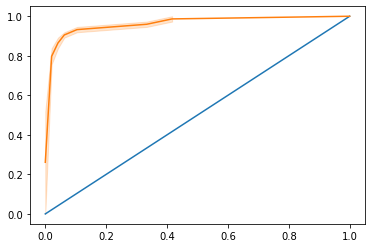

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y, y_scores[:,1])
sns.lineplot([0, 1], [0, 1])
sns.lineplot(fpr, tpr)

In [23]:
auc = roc_auc_score(y,y_scores[:,1])
print(auc)

0.9712837837837838
